# Laboration 4: Linjär regression
Denna laboration består av fem mindre obligatoriska uppgifter. Alla avser olika aspekter av linjär regression för ett problem med riskfaktorer för typ-2 diabetes. Linjär regression är anlogt med minsta-kvadratmetoden som ni studerat i linjär algebra. Skillnaden är att vi kommer att tolka och analysera metoden utifrån perspektivet av sannolikhetslära och statistik. Avvikkelser hos data från anpassad rät linje tolkas som normalfördelade och oberoende. Parametrar skattas med tillhörande konfidensintervall. Linjär regression är en grundpelare och naturlig *base line* inom dataanalys och maskininlärning. 

## Obligatorisk förberedelse innan laborationen startar
Studera video och tillhörande anteckningar om linjär regression. Huvudexempelet som gås igenom där finns även beskrivet i kursboken (Walpole et al). Läshänvisningar för detta finner ni i studieguiden. **I studieguiden finns även rekommenderade uppgifter som ni förväntas lösa innan laborationen för att förstå vad det hela går ut på.** Videon går lite djupare än boken på vissa detaljer som inte är nödvändiga för att lösa uppgifterna men som kan bidra till djupare förståelse kring varför formler och slutsatser ser ut som de gör.
## Genomförande
Laborationen genomförs på plats i sal i par eller enskilt. Om man arbetar i par växlar man mellan att vara navigatör och kodare i skift om 10-15 minuter.
## Examination
Laborationen examineras på plats genom att visa upp lösningar och svara på frågor kring lösningarna. 

____________________________________________________________
____________________________________________________________

## Ladda data
I en studie av riskfaktorer för typ-2 diabetes undersöktes människor i åldern 35-55 år. Diastoliskt blodtryck y i mmHg, och ålder x i år för ett urval av 20 av dessa personer analyseras enligt enkel linjär
regression. Data finns i filen Blodtryck. Vi börjar med att läsa in data, vilket enklast görs med 
```diabetes_data = np.genfromtxt('ditt_filnamn.csv', delimiter=',')```


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

diabetes_data = np.genfromtxt('blodtryck.csv', delimiter=',')

ÅLDER = diabetes_data[:, 0]  # Ålder
BLODTRYCK = diabetes_data[:, 1]  # Diastoliskt blodtryck

## Visualisera
I nästa steg ska du plotta datamaterialet. Använd förslagsvis kommandot ```sns.scatterplot```. Är det rimligt att anta en linjär regressions modell?

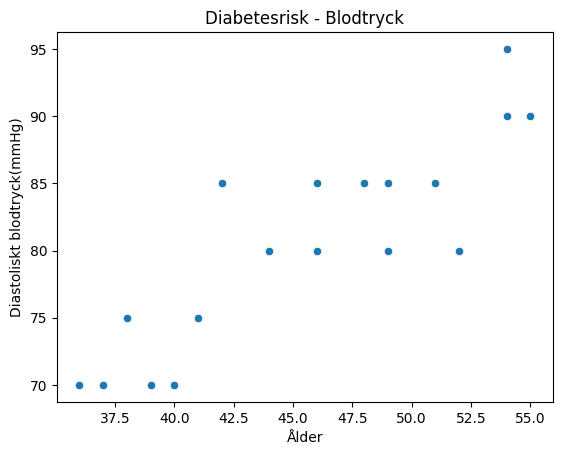

'\nÄr det rimligt att anta en linjär regressions modell?\nSvar: Ja.\n'

In [7]:
# Plotta scatterplot
sns.scatterplot(x=ÅLDER, y=BLODTRYCK)
plt.xlabel('Ålder')
plt.ylabel('Diastoliskt blodtryck(mmHg)')
plt.title('Diabetesrisk - Blodtryck')

# Visa plotten
plt.show()

'''
Är det rimligt att anta en linjär regressions modell?
Svar: Ja.
'''

## Anpasssa din modell
Om vi antar en teoretisk modell
$y = kx + m + \varepsilon$, 
där $\varepsilon \sim N(0, \sigma^2)$, kan vi givet data, anpassa en regressionslinje $E[y] = \hat{k}x + \hat{m}$:
<ol type="a">
  <li>Beräkna skattningarna k^ och m^ med hjälp av normalekvationen.</li>
  <li>Vad är tolkningen av dessa skattningar? Är värdet m^ rimligt i sammanhanget?</li>
  <li>Plotta regressionslinjen i samma plot som användes i 1).</li>
</ol>

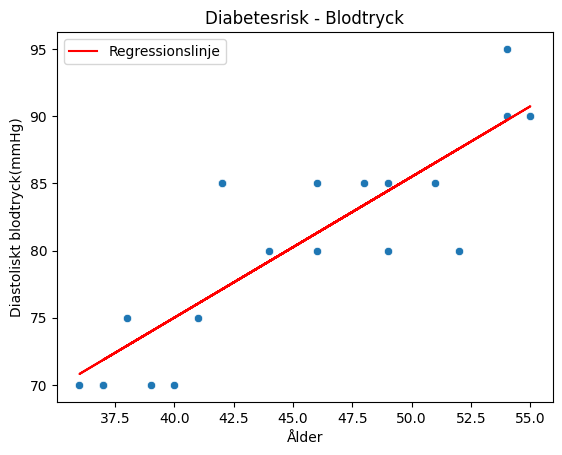

'\nb. Vad är tolkningen av dessa skattningar? Är värdet m^ rimligt i sammanhanget?\nSvar: Tolkning av skattningarna: Skattningen för k (k_hat) representerar förändringen i det diastoliska blodtrycket för varje enhetsökning i ålder.\nSkattningen för m (m_hat) representerar det förväntade diastoliska blodtrycket vid ålder noll. Tolkningen av m_hat beror på sammanhanget och kan variera.\nI det här fallet skulle det kunna representera det diastoliska blodtrycket för en person i ålder noll, vilket kanske inte har en praktisk betydelse.\nm_hat kan vara rimligt när det relateras till våra givna värden men inte realistiskavärden.\n'

In [8]:
X = ÅLDER  # Ålder
y = BLODTRYCK  # Diastoliskt blodtryck

X = np.column_stack((np.ones_like(X), X))  # Lägger till en kolumn med ettor för konstanttermen

# Beräkna skattningarna för k och m
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
k_hat = theta[1]    # 1.0483870967741977
m_hat = theta[0]    # 33.072580645161636

# Plotta scatterplot
sns.scatterplot(x=ÅLDER, y=BLODTRYCK)
plt.plot(ÅLDER, k_hat * ÅLDER + m_hat, color='red', label='Regressionslinje')
plt.xlabel('Ålder')
plt.ylabel('Diastoliskt blodtryck(mmHg)')
plt.title('Diabetesrisk - Blodtryck')
plt.legend()

# Visa plotten
plt.show()

'''
b. Vad är tolkningen av dessa skattningar? Är värdet m^ rimligt i sammanhanget?
Svar: Tolkning av skattningarna: Skattningen för k (k_hat) representerar förändringen i det diastoliska blodtrycket för varje enhetsökning i ålder.
Skattningen för m (m_hat) representerar det förväntade diastoliska blodtrycket vid ålder noll. Tolkningen av m_hat beror på sammanhanget och kan variera.
I det här fallet skulle det kunna representera det diastoliska blodtrycket för en person i ålder noll, vilket kanske inte har en praktisk betydelse.
m_hat kan vara rimligt när det relateras till våra givna värden men inte realistiskavärden.
'''

## Konfidens och korrelation
I denna uppgift ska du beräkna ett 95% konfidensintervall för $\hat{k}$? Innehåller intervallet 0? Vad tyder det på? Du ska även beräkna korrelationen mellan $x$ och $y$. Vad tyder detta på?

In [9]:
n = len(diabetes_data)  # Antal observationer
p = 2  # Antal modellparametrar (inklusive konstanttermen)
df = n - p  # Frihetsgrader för t-distributionen

y_pred = k_hat * ÅLDER + m_hat  # Förutsagda värden
residuals = BLODTRYCK - y_pred  # Residualer

# Beräkna standardfelet för k_hat
MSE = np.sum(residuals**2) / df  # Mean Squared Error (MSE)
standard_error = np.sqrt(MSE / np.sum((ÅLDER - np.mean(ÅLDER))**2))

# Beräkna gränserna för konfidensintervallet
t_value = 2.093  # T-värde för 95% konfidens vid df=18 (från t-fördelnings tabell)
lower_bound = k_hat - t_value * standard_error
upper_bound = k_hat + t_value * standard_error

# Skriv ut konfidensintervallet
print(f"95% Konfidensintervall för k_hat: [{lower_bound}, {upper_bound}]")


# Beräkna korrelationen mellan x och y
correlation = np.corrcoef(ÅLDER, BLODTRYCK)[0, 1]

# Skriv ut korrelationen
print(f"Korrelation mellan x och y: {correlation}")

'''
Konfidensintervall:
Innehåller intervallet 0?
Svar: Nej.
Vad tyder det på?
Svar: Om konfidensintervallet innehåller noll (0) betyder det att nollhypotesen, där k = 0 (ingen linjär relation mellan x och y),
inte kan förkastas på 5% signifikansnivå. Om nollhypotesen inte förkastas betyder det att det inte finns tillräckligt med statistiska bevis
för att påstå att det finns en linjär relation mellan x och y.

Korrelation:
Vad tyder detta på?
Svar: En positiv korrelation indikerar att högre värden på x tenderar att korrelera med högre värden på y,
medan en negativ korrelation indikerar att högre värden på x korrelerar med lägre värden på y.
Närmare 0-korrelation indikerar att det inte finns något linjärt samband mellan x och y.
'''

95% Konfidensintervall för k_hat: [0.7320042393982857, 1.3647699541501097]
Korrelation mellan x och y: 0.853047633587471


'\nKonfidensintervall:\nInnehåller intervallet 0?\nSvar: Nej.\nVad tyder det på?\nSvar: Om konfidensintervallet innehåller noll (0) betyder det att nollhypotesen, där k = 0 (ingen linjär relation mellan x och y),\ninte kan förkastas på 5% signifikansnivå. Om nollhypotesen inte förkastas betyder det att det inte finns tillräckligt med statistiska bevis\nför att påstå att det finns en linjär relation mellan x och y.\n\nKorrelation:\nVad tyder detta på?\nSvar: En positiv korrelation indikerar att högre värden på x tenderar att korrelera med högre värden på y,\nmedan en negativ korrelation indikerar att högre värden på x korrelerar med lägre värden på y.\nNärmare 0-korrelation indikerar att det inte finns något linjärt samband mellan x och y.\n'

## Prediktion
Charlie Sheen (52 år) vill nu mäta sitt blodtryck. Om man inte tar hänsyn till hans livsstil och använder sig bara av vår datamängd, vad blir 95% intervall för den mätningen. Vilket intervall (konfidens-/prediktions-) använder vi i detta fall?

In [14]:
# Skapa observation för Charlie Sheen
new_observation = np.array([52, 0])  # [Ålder, Dummy-variabel (1 för konstanttermen)]

# Anpassa modellen med den nya observationen
y_pred_charlie = k_hat * new_observation[0] + m_hat  # Förutsägda värden för Charlie Sheen

# Beräkna standardfelet för prediktion
std_deviation = np.std(residuals)
x_mean = np.mean(ÅLDER)

prediction_std_error = std_deviation * np.sqrt(1 + (1/n) + ((new_observation[0] - x_mean)**2/ np.sum((ÅLDER - x_mean)**2)))

# Beräkna gränserna för prediktionsintervallet
t_value = 2.093  # T-värde för 95% konfidens vid df=18 (från t-fördelnings tabell)

lower_bound_pred = y_pred_charlie - t_value * prediction_std_error
upper_bound_pred = y_pred_charlie + t_value * prediction_std_error

# Skriv ut prediktionsintervallet
print(f"95% Prediktionsintervall för Charlie Sheens blodtryck: [{lower_bound_pred}, {upper_bound_pred}]")

'''
Vilket intervall (konfidens-/prediktions-) använder vi i detta fall?
Svar: I detta fall använder vi ett konfidensintervall för prediktion, inte för konfidens.
Ett konfidensintervall för prediktion tar hänsyn till osäkerheten i prediktionen av en ny observation
baserat på den befintliga modellen och det observerade datamaterialet.
'''

95% Prediktionsintervall för Charlie Sheens blodtryck: [78.94051289115717, 96.23690646368269]


'\nVilket intervall (konfidens-/prediktions-) använder vi i detta fall?\nSvar: I detta fall använder vi ett konfidensintervall för prediktion, inte för konfidens.\nEtt konfidensintervall för prediktion tar hänsyn till osäkerheten i prediktionen av en ny observation\nbaserat på den befintliga modellen och det observerade datamaterialet.\n'